In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi
from scipy.sparse import csr_matrix, csc_matrix, linalg as sla

sigma_0 = np.array([[1,0],[0,1]])
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])

# Let us make a function that calculates the nnls distribution from the spectrum

In [39]:
thetas = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

i = 7 ### selected value of thea!!
Nx = 51 #Assume translational invariance in x direction
Ny = 51
nbands = int((Nx*Ny)/100*16)
print('Bands to calculate: ',nbands)


parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    disorder = 0,
    theta = -(pi/2)*(thetas[i]/100),
)

Bands to calculate:  416


In [40]:
ener, states, degenerate_indices = tb.solve_eigenproblem_square(parameters, number_of_bands = nbands)

19


/tmp/ipykernel_47268/2172453664.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


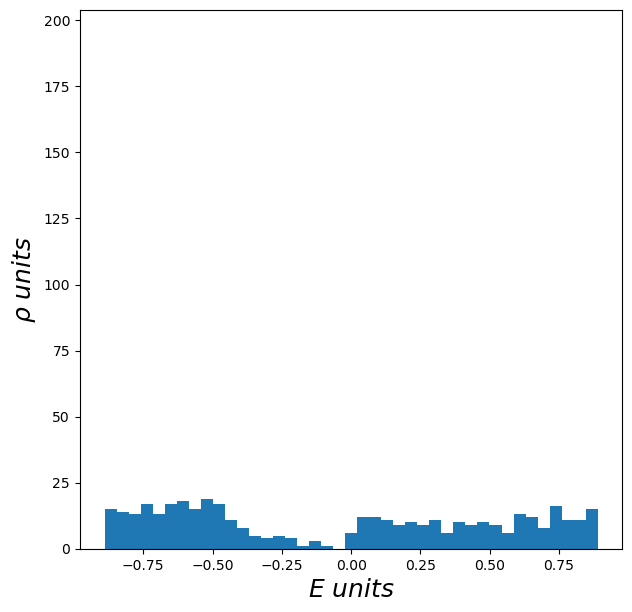

In [41]:
ran = max(ener)

histogram, bin_edges = np.histogram(ener, bins = 41, range = (-ran,ran), density = False )

y = histogram
x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])/2

print(max(histogram))

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)


ax.bar(x,y,width = 2*dx)

ax.set_ylabel(r"$\rho$ $units$",fontsize = 18)
ax.set_xlabel(r"$E$ $units$",fontsize = 18)
ax.set_ylim(0,2*(Nx+Ny))

fig.show()


### Now let us make a function that, given a spectrum, calculates the level spacings
Could it be a problem that we assumed the degeneracy of the non-orthogonal states?

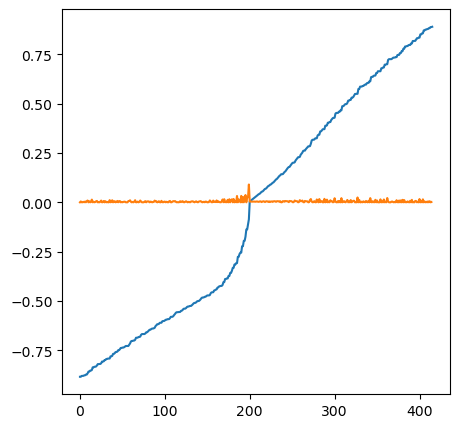

In [46]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)
ax.plot(np.sort(ener))
ax.plot((np.sort(ener)-np.roll(np.sort(ener),1))[1:])

Number of orthogonalised states:  0
195


/tmp/ipykernel_47268/2720676207.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


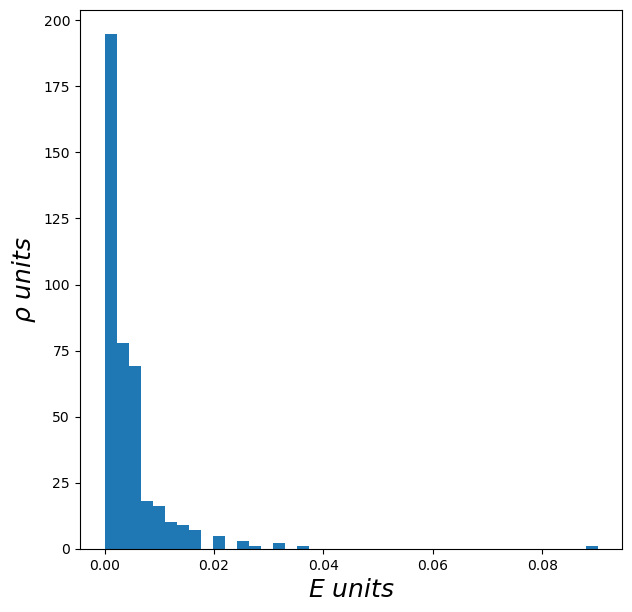

In [47]:
print("Number of orthogonalised states: " ,len(degenerate_indices))

def nnls_distribution(spectrum):
    spacings = np.sort(spectrum)-np.roll(np.sort(spectrum),1)
    return spacings[1:]

spacings = nnls_distribution(ener)

histogram, bin_edges = np.histogram(spacings, bins = 41, density = False )

y = histogram
x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])/2

print(max(histogram))

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)


ax.bar(x,y,width = 2*dx)

ax.set_ylabel(r"$\rho$ $units$",fontsize = 18)
ax.set_xlabel(r"$E$ $units$",fontsize = 18)
ax.set_ylim(0,2*(Nx+Ny))

fig.show()


### It look Piossonian (although the sample is not too big). Will we see something different with a different shape?

The 'outlier' is the minigap

In [ ]:
for i in range(nbands):
    to_plot = states[i,:,:,:]

    fig = plt.figure(figsize = (3,3))
    ax = fig.add_subplot(111)
    
    ax.imshow(np.sum(np.abs(to_plot)**2,axis = 0),vmin = 0)
    #ax.imshow(np.abs(to_plot[1])**2,vmin = 0,cmap = 'cividis') This would plot only spin down probability density
    formatted_number = f"{ener[i]:.4e}"
    plt.text(2, 8,rf'$E ={formatted_number}$' , fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
    
    ax.set_ylabel(r"$y$ $units$",fontsize = 12)
    ax.set_xlabel(r"$x$ $units$",fontsize = 12)
    
    
    fig.show()